Optimization terminated successfully.
         Current function value: 0.201983
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:       cardiac_abnormal   No. Observations:                   18
Model:                          Logit   Df Residuals:                       15
Method:                           MLE   Df Model:                            2
Date:                Fri, 25 Jul 2025   Pseudo R-squ.:                  0.7086
Time:                        18:43:13   Log-Likelihood:                -3.6357
converged:                       True   LL-Null:                       -12.477
Covariance Type:            nonrobust   LLR p-value:                 0.0001447
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.2864     14.442      1.543      0.123      -6.019      50.592
ECHO_velocity    -0

FileNotFoundError: [Errno 2] No such file or directory: '/Users/joyce/同步空间/布里渊/python final/Final file/导出图片/ROC_曲线_summary.png'

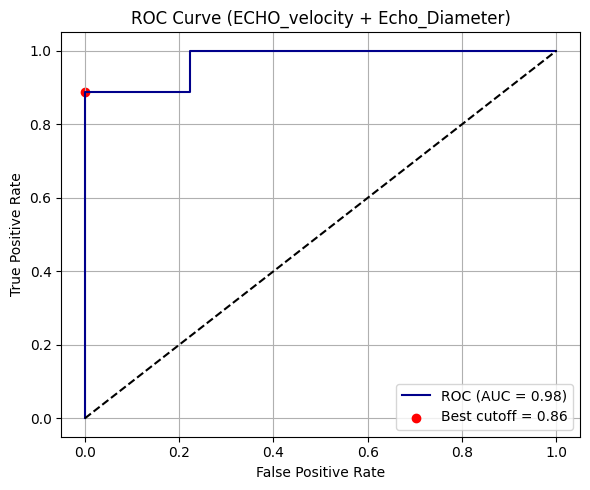

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import os

# === 确保图片保存目录存在 ===
os.makedirs("./Figure", exist_ok=True)

# === 1. 加载数据 ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif
import os


# 如果从剪贴板读取有问题，可以手动创建DataFrame
# 这里我根据您提供的数据结构手动创建DataFrame
df = pd.DataFrame({
    'Case': [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10,11,11,11],
    'GA': [24.71,24.71,24.71,24.14,24.14,24.14,24.00,24.00,24.00,25.43,25.43,25.43,
           26.14,26.14,26.14,28.00,28.00,28.00,26.43,26.43,26.43,35.29,35.29,35.29,
           24.57,24.57,24.57,33.00,33.00,33.00,26.71,26.71,26.71],
    'plane': ['PA','DA','AO']*11,
    'BFS': [17.226,17.221,17.320,17.552,17.144,17.288,17.249,17.173,17.376,17.287,17.283,17.040,
            17.393,17.195,17.555,17.379,17.530,17.575,17.495,17.225,17.569,17.639,17.320,17.373,
            17.443,17.350,17.218,17.716,17.571,17.644,np.nan,np.nan,np.nan],
    'IMT': [356.30,564.05,525.90,267.70,633.15,281.60,369.90,383.00,420.10,377.70,775.30,493.20,
            471.20,798.45,586.50,450.10,457.55,488.10,571.80,712.55,793.80,490.00,480.00,400.00,
            543.00,453.55,394.50,380.00,400.70,330.00,np.nan,np.nan,np.nan],
    'Echo_Diameter': [4.30,2.00,3.70,5.40,3.50,2.45,np.nan,np.nan,np.nan,6.10,2.30,2.40,
                      np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
                      5.20,3.00,3.90,7.10,4.30,3.40,5.20,3.50,4.10],
    'ECHO_velocity': [57.00,63.00,63.00,57.00,75.00,56.00,np.nan,np.nan,np.nan,53.60,46.00,56.00,
                      np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
                      87.00,71.00,93.97,103.00,139.00,130.00,64.00,87.00,87.50],
    'CFD_Pressure': [-0.10,-1.41,0.16,-0.62,-1.23,-1.94,np.nan,np.nan,np.nan,-0.10,-0.43,2.56,
                     np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
                     -0.17,-1.70,2.28,-1.52,-6.57,0.91,-0.38,-2.97,-0.72],
    'CFD_WSS': [8.28,159.86,45.53,82.34,98.03,130.24,np.nan,np.nan,np.nan,9.72,67.29,165.79,
                np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
                19.91,176.49,110.83,171.40,539.85,111.55,39.22,191.19,186.88],
    'CFD_Q': [1.33,1.33,6.28,7.41,7.41,7.41,np.nan,np.nan,np.nan,1.62,1.62,-1.15,
              np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
              2.62,2.62,7.81,14.47,14.47,5.90,2.64,2.64,5.17],
    'CFD_Velocity': [14.30,56.45,45.67,47.77,62.33,72.11,np.nan,np.nan,np.nan,14.53,29.15,83.05,
                     np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
                     22.15,64.20,56.61,93.95,142.08,63.90,31.09,82.39,74.08],
    'cardiac_abnormal': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]
})

# === 2. 提取有效数据 ===
data = df[['cardiac_abnormal', 'ECHO_velocity', 'Echo_Diameter']].dropna()
X = data[['ECHO_velocity', 'Echo_Diameter']]
y = data['cardiac_abnormal']

# === 3. statsmodels 建立带截距的 Logistic 回归模型 ===
X_with_const = sm.add_constant(X)
model = sm.Logit(y, X_with_const)
result = model.fit()

# === 4. 打印模型统计 summary（包括 R²、p 值、OR 等）===
print(result.summary())
print("\nMcFadden R²:", result.prsquared)

# === 5. 预测概率 & ROC 曲线 ===
y_pred_prob = result.predict(X_with_const)
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
auc_score = roc_auc_score(y, y_pred_prob)

# === 6. 最佳cutoff（Youden's J）===
youden_index = tpr - fpr
best_cutoff = thresholds[np.argmax(youden_index)]
print(f"\nAUC = {auc_score:.3f}")
print(f"Best cutoff = {best_cutoff:.3f}")

# === 7. 敏感性、特异性计算 ===
y_pred_label = (y_pred_prob >= best_cutoff).astype(int)
cm = confusion_matrix(y, y_pred_label)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f"Sensitivity = {sensitivity:.3f}")
print(f"Specificity = {specificity:.3f}")

# === 8. 可视化 ROC 曲线并保存 ===
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc_score:.2f})', color='darkblue')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[np.argmax(youden_index)], tpr[np.argmax(youden_index)],
            color='red', label=f'Best cutoff = {best_cutoff:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (ECHO_velocity + Echo_Diameter)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

# 保存ROC曲线图片
roc_save_path = "Figure/ROC Curve (ECHO_velocity + Echo_Diameter).png"
plt.savefig(roc_save_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()  # 关闭图形
